<h2>Gradient Descent</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math

In [2]:
def predict():
    df = pd.read_csv("Content Files/test_scores.csv")
    reg = LinearRegression()
    reg.fit(df[['math']],df.cs)
    return reg.coef_, reg.intercept_

In [3]:
%matplotlib inline
def gradient_descent(x,y):
    m_current = b_current = 0
    iteration = 1000
    rate = 0.0002
    n = len(x)
    cost_prev = 0
    plt.scatter(x,y,color='blue',marker='*')
    
    for i in range(iteration):
        y_predicted = m_current * x + b_current
        cost = (1/n)*sum([val**2 for val in (y-y_predicted)])
        plt.plot(x,y_predicted,color='yellow', alpha=0.7)
        m_derivative = -(2/n)*sum(x*(y-y_predicted))
        b_derivative = -(2/n)*sum(y-y_predicted)
        m_current = m_current - rate * m_derivative
        b_current = b_current - rate * b_derivative
        if math.isclose(cost, cost_prev, rel_tol=1e-20):
            break
        cost_prev = cost
        #print ("m {}, b {}, cost {}, iteration {}".format(m_current,b_current,cost, i))
    
    return m_current, b_current

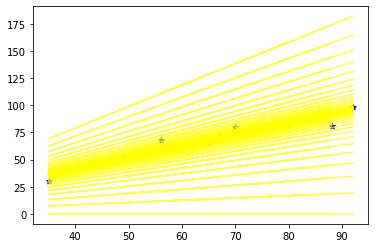

In [4]:
if __name__ == '__main__':
    df = pd.read_csv("Content Files/test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)
    
    m, b = gradient_descent(x,y)
    #print("Gradient Descent, coef: {} & intercept: {}".format(m,b))
    
    #m_pred, b_pred = predict()
    #print("Sklearn Predict, coef: {} & intercept: {}".format(m_pred,b_pred))

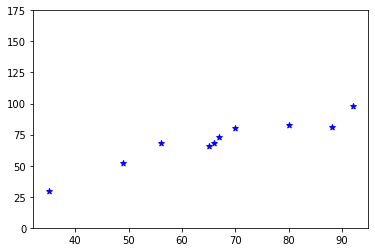

In [5]:
plt.ylim(0,175)
plt.yticks([0,25,50,75,100,125,150,175])
plt.scatter(x,y,color='blue',marker='*')

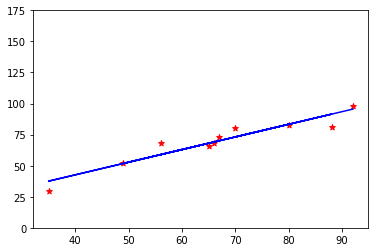

In [6]:
m_pred, b_pred = predict()
y_predicted = m_pred * x + b_pred
plt.ylim(0,175)
plt.yticks([0,25,50,75,100,125,150,175])
plt.scatter(x,y,color='red',marker='*')
plt.plot(x,y_predicted, color='blue')